<a href="https://colab.research.google.com/github/KarthikSaravanakumarM56/24ADI003-24BAD056/blob/main/SCENARIO_2_EXP_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving auto-mpg.csv to auto-mpg.csv


24BAD056 - M.Karthik Saravanakumar
Degree: 2
MSE: 18.41696779601778
RMSE: 4.291499481069266
R2: 0.6391701147013314



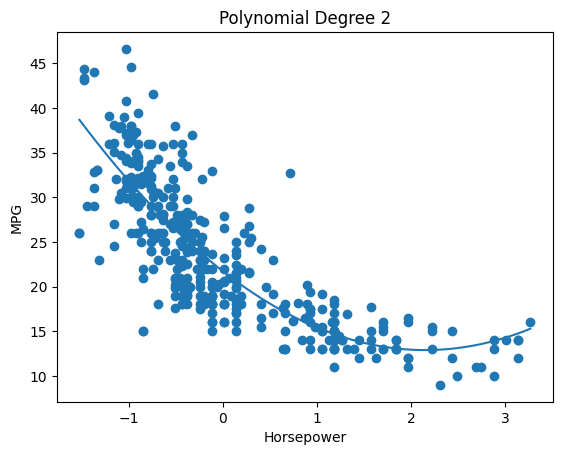

Degree: 3
MSE: 18.46026722222463
RMSE: 4.296541309265469
R2: 0.6383217814053861



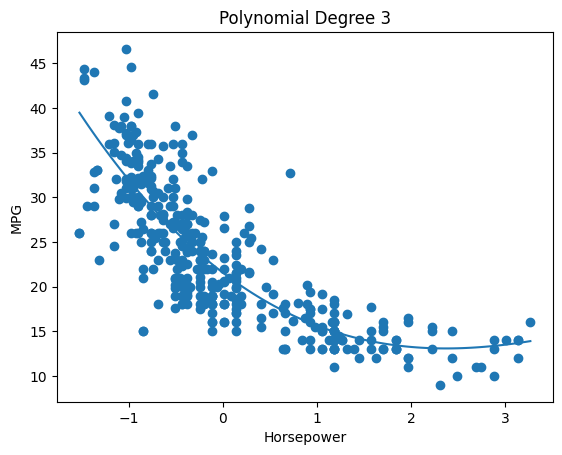

Degree: 4
MSE: 18.268226874853184
RMSE: 4.274134634619409
R2: 0.6420842844016577



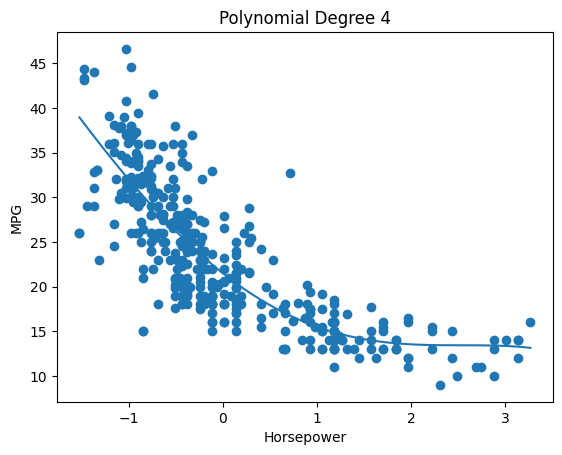

Ridge R2: 0.6413187331941281


In [2]:
print("24BAD056 - M.Karthik Saravanakumar")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("auto-mpg.csv")

df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df = df.dropna()

X = df[['horsepower']]
y = df['mpg']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

degrees = [2,3,4]

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X_scaled)

    X_train,X_test,y_train,y_test = train_test_split(
        X_poly,y,test_size=0.2,random_state=42)

    model = LinearRegression()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    print("Degree:",d)
    print("MSE:",mean_squared_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
    print("R2:",r2_score(y_test,y_pred))
    print()

    X_range = np.linspace(X_scaled.min(),X_scaled.max(),100).reshape(-1,1)
    X_range_poly = poly.transform(X_range)
    y_range_pred = model.predict(X_range_poly)

    plt.scatter(X_scaled,y)
    plt.plot(X_range,y_range_pred)
    plt.title("Polynomial Degree "+str(d))
    plt.xlabel("Horsepower")
    plt.ylabel("MPG")
    plt.show()

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X_scaled)

X_train,X_test,y_train,y_test = train_test_split(
    X_poly,y,test_size=0.2,random_state=42)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train,y_train)

print("Ridge R2:",r2_score(y_test,ridge.predict(X_test)))
